In [65]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## 1. Loading Data

In [23]:
df_x = pd.read_csv('/global/home/mma_jchen4/.local/mma869/train_values.csv')
df_y = pd.read_csv('/global/home/mma_jchen4/.local/mma869/train_labels.csv')
df = df_x.merge(df_y, left_on='building_id', right_on = 'building_id')

In [3]:
df.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


## 2. EDA

In [4]:
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

rows: 260601
columns: 40


In [5]:
df.isna().values.any()

False

No null values found

In [6]:
# df.T.duplicated()

No duplicated value found

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

The data is large, it has a multi-class objective, and the most valuable features are categorical with many categories/levels.

In [8]:
df.nunique()

building_id                               260601
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_mud_mortar_brick            2
has_superstructure_c

We spotted some features are the binary data.

In [9]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Seems like there some outliers in the feature age

<AxesSubplot:xlabel='age'>

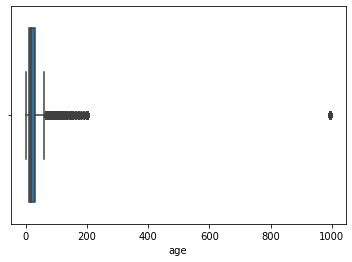

In [10]:
# Visualize the outliers
sns.boxplot(df['age'])

Let's leave it for now.

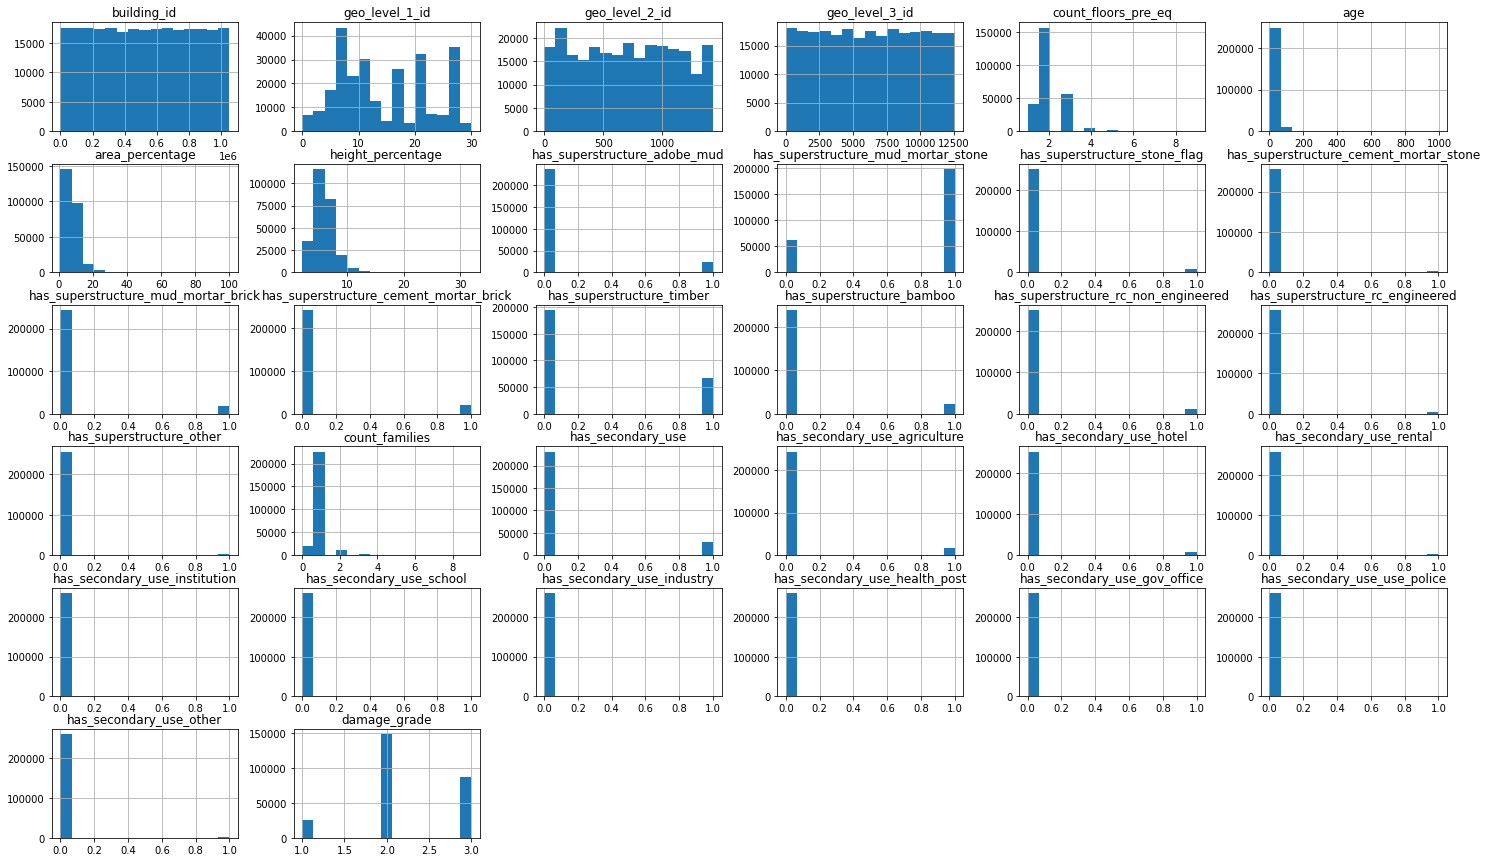

In [11]:
# Using pandas to make histograms
df.hist(figsize=(25,15), bins=15)
plt.show()

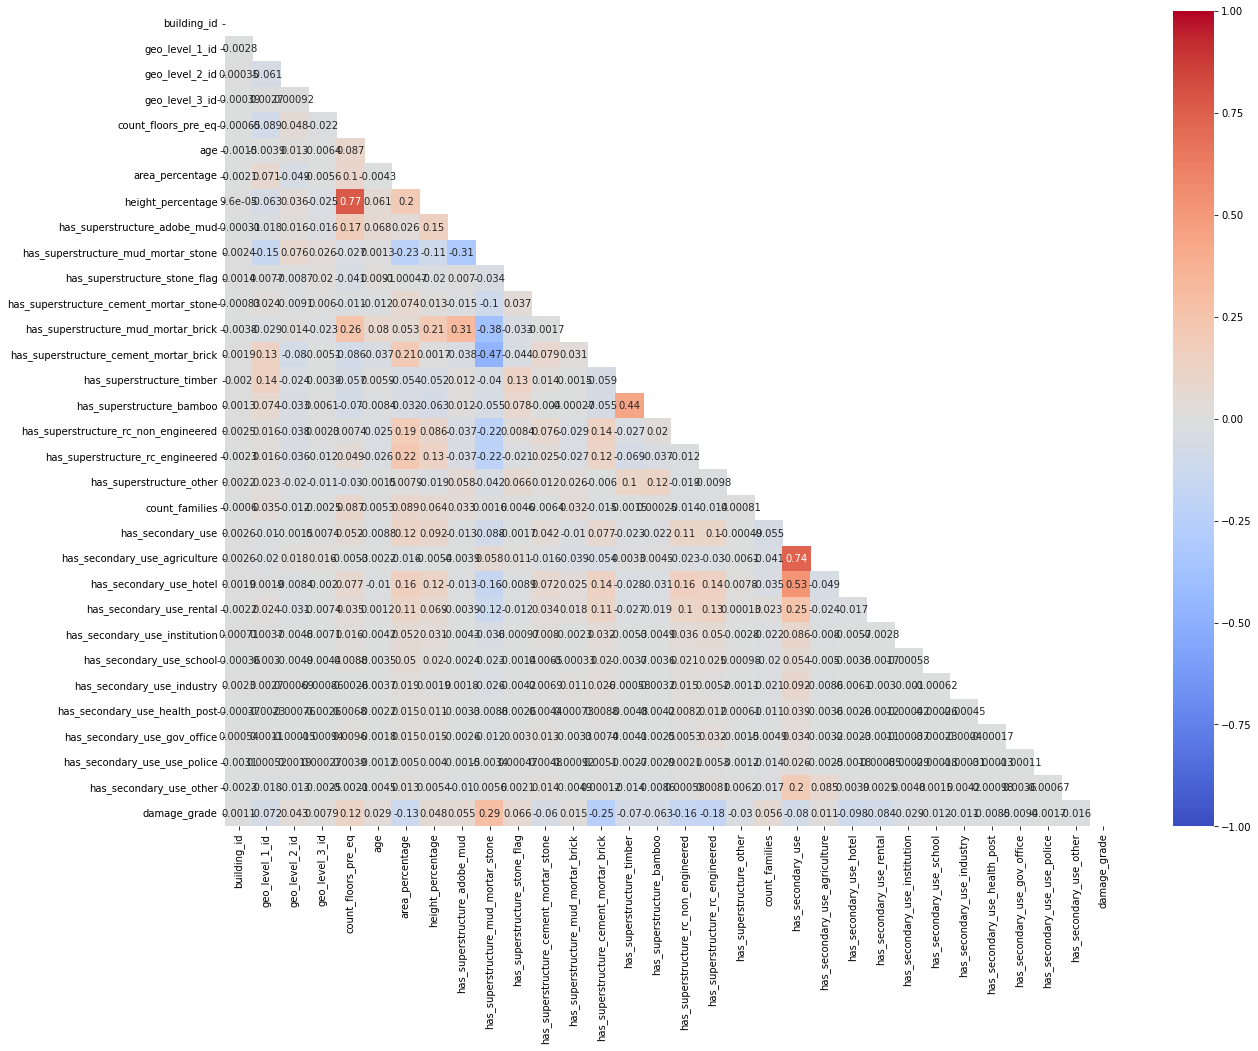

In [12]:
# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = df.corr()
# Heatmap
plt.figure(figsize=(20,15))
matrix = np.triu(corr_mat)
sns.heatmap(corr_mat, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=True, mask=matrix)
plt.show()

### Data Cleaning

In [31]:
new_df = df.drop(['building_id'], axis = 1)

In [32]:
new_df['geo_level_1_id']= new_df['geo_level_1_id'].apply(str)
new_df['geo_level_2_id']= new_df['geo_level_2_id'].apply(str)
new_df['geo_level_3_id']= new_df['geo_level_3_id'].apply(str)

In [33]:
new_df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


## 4. Modeling

In [9]:
from sklearn.model_selection import train_test_split
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

### Train test split

In [6]:
# Saving the features to 'X'
X = new_df.drop("damage_grade", axis=1)
# Saving target to 'y'
y = new_df["damage_grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Feature Engineering

In [7]:
obj_cols = list(new_df.select_dtypes(include=['object']))
obj_cols

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [8]:
enc = ce.OrdinalEncoder.TargetEncoder(cols = obj_cols)
enc.fit(X_train, y_train)
enc_df1 = enc.transform(X_train[obj_cols])
enc_df2 = enc.transform(X_test[obj_cols])

In [9]:
X_train = enc_df1.join(X_train.drop(obj_cols, axis = 1))
X_test = enc_df2.join(X_test.drop(obj_cols, axis = 1))

## Cross Validation 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import model_selection

In [22]:
# LR_model = LogisticRegression()
# DT_model = DecisionTreeClassifier()

# LR_model.fit(X_train, y_train)
# DT_model.fit(X_train, y_train)

# print("Test Set Scores:")
# print(f"Logistic Regression: {LR_model.score(X_test, y_test)}")
# print(f"Decision Tree score: {DT_model.score(X_test, y_test)}")

In [34]:
obj_cols = list(new_df.select_dtypes(include=['object']))

In [29]:
# Saving the features to 'X'
X = new_df.drop("damage_grade", axis=1)
# Saving target to 'y'
y = new_df["damage_grade"]
   
enc = ce.OrdinalEncoder.TargetEncoder(cols = obj_cols)
enc.fit(X, y)    
enc_df = enc.transform(X[obj_cols])
X = enc_df.join(X.drop(obj_cols, axis = 1))

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
RF_model = RandomForestClassifier(random_state=1, n_estimators=100, max_depth =10)
#XGB_model = XGBClassifier()
LGBM_model = LGBMClassifier(objective='softmax', num_class=3, n_estimators=100, max_depth=10, is_unbalance=True)
CAT_model = CatBoostClassifier(objective='MultiClass', n_estimators=100, max_depth=10)

# RF_model.fit(X_train, y_train)
# #XGB_model.fit(X_train, y_train)
# LGBM_model.fit(X_train, y_train)
# CAT_model.fit(X_train, y_train)

scores1 = cross_val_score(RF_model, X, y, cv=5, scoring = 'f1_micro')
scores2 = cross_val_score(LGBM_model, X, y, cv=5, scoring = 'f1_micro')
scores3 = cross_val_score(CAT_model, X, y, cv=5, scoring = 'f1_micro')

print("CV Scores:")
print(f"Random Forest score: {scores1.mean()}")
print(f"LightGBM score: {scores2.mean()}")
print(f"CatBoost score: {scores3.mean()}")

# print("Test Set Scores:")
# print(f"Random Forest score: {RF_model.score(X_test, y_test)}")
# #print(f"XGB score: {XGB_model.score(X_test, y_test)}")
# print(f"LightGBM score: {LGBM_model.score(X_test, y_test)}")
# print(f"CatBoost score: {CAT_model.score(X_test, y_test)}")

Learning rate set to 0.5
0:	learn: 0.7683240	total: 282ms	remaining: 28s
1:	learn: 0.6675421	total: 483ms	remaining: 23.7s
2:	learn: 0.6211801	total: 635ms	remaining: 20.5s
3:	learn: 0.5952764	total: 816ms	remaining: 19.6s
4:	learn: 0.5817168	total: 965ms	remaining: 18.3s
5:	learn: 0.5744508	total: 1.13s	remaining: 17.7s
6:	learn: 0.5688392	total: 1.27s	remaining: 16.9s
7:	learn: 0.5635410	total: 1.43s	remaining: 16.4s
8:	learn: 0.5610243	total: 1.64s	remaining: 16.6s
9:	learn: 0.5580010	total: 1.81s	remaining: 16.3s
10:	learn: 0.5558184	total: 1.96s	remaining: 15.9s
11:	learn: 0.5535416	total: 2.14s	remaining: 15.7s
12:	learn: 0.5516357	total: 2.3s	remaining: 15.4s
13:	learn: 0.5504383	total: 2.46s	remaining: 15.1s
14:	learn: 0.5492562	total: 2.61s	remaining: 14.8s
15:	learn: 0.5477069	total: 2.77s	remaining: 14.6s
16:	learn: 0.5466424	total: 2.95s	remaining: 14.4s
17:	learn: 0.5451706	total: 3.12s	remaining: 14.2s
18:	learn: 0.5444186	total: 3.3s	remaining: 14.1s
19:	learn: 0.5431127

LightGBM seems to perform the best in here

## Hyperparameter Tuning

In [13]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
import catboost as cb

In [14]:
import lightgbm as lgb

In [41]:
# Saving the features to 'X'
X = new_df.drop("damage_grade", axis=1)
# Saving target to 'y'
y = new_df["damage_grade"]

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [44]:
obj_cols = list(new_df.select_dtypes(include=['object']))
obj_cols

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  object
 1   geo_level_2_id                          260601 non-null  object
 2   geo_level_3_id                          260601 non-null  object
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [43]:
enc = ce.OrdinalEncoder(cols = obj_cols)
enc.fit(train_x, train_y)
train_x = enc.transform(train_x)
valid_x = enc.transform(valid_x)

In [66]:
def objective(trial):
    
    # Saving the features to 'X'
    X = new_df.drop("damage_grade", axis=1)
    X = enc.transform(X)
    # Saving target to 'y'
    y = new_df["damage_grade"]
    
    param={
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 20, 2000, step=20),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 2000, step=100),
        "max_depth": trial.suggest_int("max_depth", 8, 12),
        'n_estimators': trial.suggest_int("n_estimators", 100, 200),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.9, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.9, step=0.1),
        "random_state": 1,
    }

    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'multi_logloss' )
    
    clf = LGBMClassifier(objective="softmax", num_class=3, n_jobs=8, is_unbalance=True, 
                         categorical_feature=[0,1,2,7,8,9,10,11,12,13,25], 
                         **param)
    
    clf.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100, callbacks=[pruning_callback])

#     preds = clf.predict(valid_x)
#     pred_labels = np.rint(preds)
#     f1 = f1_score(valid_y, pred_labels, average='micro')

    # Run CV to see how well these hyper_params do
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring="f1_macro")
    score = np.mean(cv_scores)
    
    return 1-score


if __name__ == "__main__":
    study = optuna.create_study(directions=["minimize"])
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-07-13 22:58:53,878] A new study created in memory with name: no-name-baccb39e-9a5d-4fb8-80ab-1da1a62ae84c


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] min_data_in_leaf is set=1720, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1720
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_gain_to_split is set=10.726468978255594, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.726468978255594
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set

[I 2022-07-13 22:59:39,266] Trial 0 finished with value: 0.3361162082345267 and parameters: {'learning_rate': 0.08473019310830478, 'num_leaves': 500, 'min_data_in_leaf': 1720, 'max_depth': 9, 'n_estimators': 186, 'lambda_l1': 20, 'lambda_l2': 35, 'min_gain_to_split': 10.726468978255594, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.3361162082345267.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] min_data_in_leaf is set=720, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=720
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=2.890678041729614, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.890678041729614
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0

[I 2022-07-13 23:00:46,688] Trial 1 finished with value: 0.31392289987541244 and parameters: {'learning_rate': 0.06650124795239692, 'num_leaves': 80, 'min_data_in_leaf': 720, 'max_depth': 8, 'n_estimators': 148, 'lambda_l1': 100, 'lambda_l2': 20, 'min_gain_to_split': 2.890678041729614, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 1 with value: 0.31392289987541244.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] min_data_in_leaf is set=1920, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1920
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=2.5803321718632546, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5803321718632546
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0

[I 2022-07-13 23:01:32,708] Trial 2 finished with value: 0.3262044640630808 and parameters: {'learning_rate': 0.08218967502467804, 'num_leaves': 700, 'min_data_in_leaf': 1920, 'max_depth': 8, 'n_estimators': 153, 'lambda_l1': 90, 'lambda_l2': 0, 'min_gain_to_split': 2.5803321718632546, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 1 with value: 0.31392289987541244.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] min_data_in_leaf is set=520, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=520
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=8.550986808344126, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.550986808344126
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, 

[I 2022-07-13 23:02:41,336] Trial 3 finished with value: 0.36557107059708627 and parameters: {'learning_rate': 0.014546670024744813, 'num_leaves': 420, 'min_data_in_leaf': 520, 'max_depth': 9, 'n_estimators': 148, 'lambda_l1': 90, 'lambda_l2': 0, 'min_gain_to_split': 8.550986808344126, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 1 with value: 0.31392289987541244.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] min_gain_to_split is set=5.441166279934265, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.441166279934265
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8

[I 2022-07-13 23:03:52,873] Trial 4 finished with value: 0.3971932558203374 and parameters: {'learning_rate': 0.014137634055167075, 'num_leaves': 1000, 'min_data_in_leaf': 320, 'max_depth': 11, 'n_estimators': 198, 'lambda_l1': 60, 'lambda_l2': 95, 'min_gain_to_split': 5.441166279934265, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 1 with value: 0.31392289987541244.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] min_data_in_leaf is set=1320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1320
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] min_gain_to_split is set=3.948367758750329, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.948367758750329
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Wa

[I 2022-07-13 23:04:38,939] Trial 5 finished with value: 0.32904638084421545 and parameters: {'learning_rate': 0.08459244529108473, 'num_leaves': 420, 'min_data_in_leaf': 1320, 'max_depth': 12, 'n_estimators': 146, 'lambda_l1': 35, 'lambda_l2': 75, 'min_gain_to_split': 3.948367758750329, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 1 with value: 0.31392289987541244.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] min_gain_to_split is set=2.6344673467879955, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6344673467879955
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:04:41,908] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:04:44,777] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:04:47,801] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:04:50,764] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:04:53,595] Trial 10 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] min_data_in_leaf is set=920, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=920
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.20100580866443307, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.20100580866443307
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0

[I 2022-07-13 23:05:58,492] Trial 11 finished with value: 0.3087696647355237 and parameters: {'learning_rate': 0.0981729673267974, 'num_leaves': 20, 'min_data_in_leaf': 920, 'max_depth': 8, 'n_estimators': 164, 'lambda_l1': 80, 'lambda_l2': 0, 'min_gain_to_split': 0.20100580866443307, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 11 with value: 0.3087696647355237.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] min_data_in_leaf is set=920, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=920
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=0.9373456777540956, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9373456777540956
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600

[I 2022-07-13 23:07:02,179] Trial 12 finished with value: 0.31147849707103514 and parameters: {'learning_rate': 0.09951603395162728, 'num_leaves': 80, 'min_data_in_leaf': 920, 'max_depth': 8, 'n_estimators': 166, 'lambda_l1': 80, 'lambda_l2': 20, 'min_gain_to_split': 0.9373456777540956, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 11 with value: 0.3087696647355237.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] min_data_in_leaf is set=1120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1120
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=0.10575093794454155, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.10575093794454155
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:07:05,316] Trial 13 pruned. Trial was pruned at iteration 4.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] min_data_in_leaf is set=1320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1320
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] min_gain_to_split is set=0.29751018797360523, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.29751018797360523
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

[I 2022-07-13 23:08:08,004] Trial 14 finished with value: 0.3110639397718289 and parameters: {'learning_rate': 0.09985352369156132, 'num_leaves': 60, 'min_data_in_leaf': 1320, 'max_depth': 9, 'n_estimators': 167, 'lambda_l1': 45, 'lambda_l2': 40, 'min_gain_to_split': 0.29751018797360523, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 11 with value: 0.3087696647355237.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] min_data_in_leaf is set=1420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1420
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=5.053912982516459, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.053912982516459
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:08:10,704] Trial 15 pruned. Trial was pruned at iteration 1.
[I 2022-07-13 23:08:13,376] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:08:16,083] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:08:18,919] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:08:21,773] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:08:24,370] Trial 20 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] min_data_in_leaf is set=920, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=920
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=1.7081306989222869, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7081306989222869
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600

[I 2022-07-13 23:09:27,652] Trial 21 finished with value: 0.3118399157985918 and parameters: {'learning_rate': 0.09501329664619942, 'num_leaves': 40, 'min_data_in_leaf': 920, 'max_depth': 8, 'n_estimators': 167, 'lambda_l1': 75, 'lambda_l2': 10, 'min_gain_to_split': 1.7081306989222869, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 11 with value: 0.3087696647355237.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] min_data_in_leaf is set=820, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=820
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_gain_to_split is set=1.7490934861086311, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7490934861086311
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600

[I 2022-07-13 23:10:34,759] Trial 22 finished with value: 0.3111715233865222 and parameters: {'learning_rate': 0.09911491168401614, 'num_leaves': 260, 'min_data_in_leaf': 820, 'max_depth': 8, 'n_estimators': 173, 'lambda_l1': 80, 'lambda_l2': 25, 'min_gain_to_split': 1.7490934861086311, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 11 with value: 0.3087696647355237.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] min_data_in_leaf is set=720, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=720
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=6.3159510607028295, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.3159510607028295
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:10:37,509] Trial 23 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:10:40,168] Trial 24 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=1120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1120
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=1.5959402336364328, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5959402336364328
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60000

[I 2022-07-13 23:11:43,743] Trial 25 finished with value: 0.30507918538989875 and parameters: {'learning_rate': 0.09844060691022538, 'num_leaves': 180, 'min_data_in_leaf': 1120, 'max_depth': 8, 'n_estimators': 173, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 1.5959402336364328, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 25 with value: 0.30507918538989875.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=1420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1420
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=0.97269574436575, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.97269574436575
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:11:55,409] Trial 26 pruned. Trial was pruned at iteration 131.
[I 2022-07-13 23:11:58,406] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:12:01,440] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:12:06,610] Trial 29 pruned. Trial was pruned at iteration 39.
[I 2022-07-13 23:12:13,270] Trial 30 pruned. Trial was pruned at iteration 62.
[I 2022-07-13 23:12:26,163] Trial 31 pruned. Trial was pruned at iteration 148.
[I 2022-07-13 23:12:29,308] Trial 32 pruned. Trial was pruned at iteration 7.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] min_data_in_leaf is set=620, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=620
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_gain_to_split is set=3.1504962170807382, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.1504962170807382
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0

[I 2022-07-13 23:13:46,583] Trial 33 finished with value: 0.30683803297963874 and parameters: {'learning_rate': 0.08339387947344395, 'num_leaves': 20, 'min_data_in_leaf': 620, 'max_depth': 8, 'n_estimators': 182, 'lambda_l1': 55, 'lambda_l2': 25, 'min_gain_to_split': 3.1504962170807382, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 25 with value: 0.30507918538989875.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] min_data_in_leaf is set=520, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=520
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=3.107969990032977, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.107969990032977
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, 

[I 2022-07-13 23:15:04,578] Trial 34 finished with value: 0.3039904226109875 and parameters: {'learning_rate': 0.08202770805473297, 'num_leaves': 60, 'min_data_in_leaf': 520, 'max_depth': 8, 'n_estimators': 182, 'lambda_l1': 45, 'lambda_l2': 5, 'min_gain_to_split': 3.107969990032977, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 34 with value: 0.3039904226109875.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] min_data_in_leaf is set=520, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=520
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=3.141838322039372, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.141838322039372
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, 

[I 2022-07-13 23:16:21,696] Trial 35 finished with value: 0.305346393371129 and parameters: {'learning_rate': 0.08167160709666736, 'num_leaves': 400, 'min_data_in_leaf': 520, 'max_depth': 8, 'n_estimators': 183, 'lambda_l1': 55, 'lambda_l2': 0, 'min_gain_to_split': 3.141838322039372, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 34 with value: 0.3039904226109875.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] min_data_in_leaf is set=520, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=520
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=5.255164204446777, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.255164204446777
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:16:24,640] Trial 36 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=3.365457992291212, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.365457992291212
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, 

[I 2022-07-13 23:17:45,581] Trial 37 finished with value: 0.3053699196652637 and parameters: {'learning_rate': 0.08181460193703552, 'num_leaves': 560, 'min_data_in_leaf': 320, 'max_depth': 8, 'n_estimators': 193, 'lambda_l1': 55, 'lambda_l2': 5, 'min_gain_to_split': 3.365457992291212, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 34 with value: 0.3039904226109875.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=4.45904708336668, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.45904708336668
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:17:48,259] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:17:51,007] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:17:53,658] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:17:56,499] Trial 41 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] min_data_in_leaf is set=420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=420
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=2.976394107913135, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.976394107913135
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8

[I 2022-07-13 23:19:14,277] Trial 42 finished with value: 0.3057287405078868 and parameters: {'learning_rate': 0.08355108049355467, 'num_leaves': 180, 'min_data_in_leaf': 420, 'max_depth': 8, 'n_estimators': 183, 'lambda_l1': 55, 'lambda_l2': 20, 'min_gain_to_split': 2.976394107913135, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 34 with value: 0.3039904226109875.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] min_data_in_leaf is set=420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=420
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.8095877445221205, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8095877445221205
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:19:16,897] Trial 43 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:19:31,255] Trial 44 pruned. Trial was pruned at iteration 167.
[I 2022-07-13 23:19:33,872] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:19:36,752] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:19:39,434] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:19:42,143] Trial 48 pruned. Trial was pruned at iteration 1.
[I 2022-07-13 23:19:45,152] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:19:47,802] Trial 50 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:19:50,407] Trial 51 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:20:06,042] Trial 52 pruned. Trial was pruned at iteration 173.
[I 2022-07-13 23:20:08,692] Trial 53 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] min_data_in_leaf is set=520, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=520
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=1.2779546181032448, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2779546181032448
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9

[I 2022-07-13 23:21:35,996] Trial 54 finished with value: 0.30208883423802524 and parameters: {'learning_rate': 0.08243799243362317, 'num_leaves': 1120, 'min_data_in_leaf': 520, 'max_depth': 8, 'n_estimators': 190, 'lambda_l1': 40, 'lambda_l2': 5, 'min_gain_to_split': 1.2779546181032448, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 54 with value: 0.30208883423802524.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] min_data_in_leaf is set=520, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=520
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=1.177661387281511, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.177661387281511
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:21:38,737] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:21:41,349] Trial 56 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] min_data_in_leaf is set=420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=420
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.693852054140812, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.693852054140812
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000

[I 2022-07-13 23:23:24,317] Trial 57 finished with value: 0.2998629049421643 and parameters: {'learning_rate': 0.09608900747460569, 'num_leaves': 1120, 'min_data_in_leaf': 420, 'max_depth': 11, 'n_estimators': 195, 'lambda_l1': 50, 'lambda_l2': 0, 'min_gain_to_split': 0.693852054140812, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 57 with value: 0.2998629049421643.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] min_data_in_leaf is set=820, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=820
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.7155390145514084, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7155390145514084
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:23:27,083] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:23:29,867] Trial 59 pruned. Trial was pruned at iteration 1.
[I 2022-07-13 23:23:32,810] Trial 60 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] min_data_in_leaf is set=420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=420
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.4183082066495083, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4183082066495083
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8

[I 2022-07-13 23:25:20,319] Trial 61 finished with value: 0.2992146299702283 and parameters: {'learning_rate': 0.09571523670022136, 'num_leaves': 1140, 'min_data_in_leaf': 420, 'max_depth': 12, 'n_estimators': 185, 'lambda_l1': 50, 'lambda_l2': 0, 'min_gain_to_split': 0.4183082066495083, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 61 with value: 0.2992146299702283.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] min_data_in_leaf is set=420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=420
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.42787381350464315, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.42787381350464315
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600

[I 2022-07-13 23:27:09,051] Trial 62 finished with value: 0.29923604185344965 and parameters: {'learning_rate': 0.09586180925423782, 'num_leaves': 1120, 'min_data_in_leaf': 420, 'max_depth': 12, 'n_estimators': 187, 'lambda_l1': 45, 'lambda_l2': 0, 'min_gain_to_split': 0.42787381350464315, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 61 with value: 0.2992146299702283.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] min_data_in_leaf is set=520, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=520
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.41856570429619655, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.41856570429619655
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600

[I 2022-07-13 23:28:57,789] Trial 63 finished with value: 0.29852926175083394 and parameters: {'learning_rate': 0.09649327942264806, 'num_leaves': 1140, 'min_data_in_leaf': 520, 'max_depth': 12, 'n_estimators': 189, 'lambda_l1': 30, 'lambda_l2': 0, 'min_gain_to_split': 0.41856570429619655, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 63 with value: 0.29852926175083394.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=0.010949468093722103, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.010949468093722103
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

[I 2022-07-13 23:30:53,346] Trial 64 finished with value: 0.2977809011412994 and parameters: {'learning_rate': 0.09712466642968204, 'num_leaves': 1140, 'min_data_in_leaf': 120, 'max_depth': 12, 'n_estimators': 188, 'lambda_l1': 30, 'lambda_l2': 10, 'min_gain_to_split': 0.010949468093722103, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 64 with value: 0.2977809011412994.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.34577333774038477, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.34577333774038477
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600

[I 2022-07-13 23:32:45,088] Trial 65 finished with value: 0.29743794459081596 and parameters: {'learning_rate': 0.09737511726575492, 'num_leaves': 1320, 'min_data_in_leaf': 120, 'max_depth': 12, 'n_estimators': 188, 'lambda_l1': 30, 'lambda_l2': 0, 'min_gain_to_split': 0.34577333774038477, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 65 with value: 0.29743794459081596.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.41082351131000094, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.41082351131000094
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:32:47,763] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:32:50,349] Trial 67 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] min_gain_to_split is set=0.6736062999336405, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6736062999336405
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600

[I 2022-07-13 23:34:37,147] Trial 68 finished with value: 0.29917503867259143 and parameters: {'learning_rate': 0.09634591678605721, 'num_leaves': 1000, 'min_data_in_leaf': 220, 'max_depth': 12, 'n_estimators': 188, 'lambda_l1': 25, 'lambda_l2': 60, 'min_gain_to_split': 0.6736062999336405, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 65 with value: 0.29743794459081596.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] min_gain_to_split is set=0.5681081853320681, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5681081853320681
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:34:39,917] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:34:42,509] Trial 70 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:35:03,287] Trial 71 pruned. Trial was pruned at iteration 183.
[I 2022-07-13 23:35:06,416] Trial 72 pruned. Trial was pruned at iteration 1.
[I 2022-07-13 23:35:09,236] Trial 73 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:35:12,161] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:35:15,075] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:35:35,049] Trial 76 pruned. Trial was pruned at iteration 182.
[I 2022-07-13 23:35:37,754] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:35:41,017] Trial 78 pruned. Trial was pruned at iteration 1.
[I 2022-07-13 23:35:43,837] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:35:59,417] Trial 80 pruned. Trial was pruned at iteration 170.
[I 2022-07-13 23:36:19,696] Trial 81 pruned. Trial was pru

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] min_data_in_leaf is set=620, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=620
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=2.230578573272978, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.230578573272978
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9

[I 2022-07-13 23:39:10,186] Trial 89 finished with value: 0.3001710251562075 and parameters: {'learning_rate': 0.08650519949619719, 'num_leaves': 1220, 'min_data_in_leaf': 620, 'max_depth': 12, 'n_estimators': 180, 'lambda_l1': 30, 'lambda_l2': 15, 'min_gain_to_split': 2.230578573272978, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 65 with value: 0.29743794459081596.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] min_data_in_leaf is set=720, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=720
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=2.1638662255176926, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.1638662255176926
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:39:13,084] Trial 90 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] min_data_in_leaf is set=620, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=620
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=0.845841082959364, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.845841082959364
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, 

[I 2022-07-13 23:40:54,552] Trial 91 finished with value: 0.29920332399073424 and parameters: {'learning_rate': 0.08552462035508922, 'num_leaves': 1340, 'min_data_in_leaf': 620, 'max_depth': 12, 'n_estimators': 181, 'lambda_l1': 30, 'lambda_l2': 5, 'min_gain_to_split': 0.845841082959364, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 65 with value: 0.29743794459081596.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] min_data_in_leaf is set=620, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=620
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.7111702654469212, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7111702654469212
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9

[I 2022-07-13 23:42:47,456] Trial 92 finished with value: 0.2979472892242918 and parameters: {'learning_rate': 0.08555308055869841, 'num_leaves': 1360, 'min_data_in_leaf': 620, 'max_depth': 12, 'n_estimators': 198, 'lambda_l1': 30, 'lambda_l2': 0, 'min_gain_to_split': 0.7111702654469212, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 65 with value: 0.29743794459081596.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] min_data_in_leaf is set=620, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=620
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] min_gain_to_split is set=0.6055356998779492, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6055356998779492
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0

[I 2022-07-13 23:44:40,824] Trial 93 finished with value: 0.29809462882875937 and parameters: {'learning_rate': 0.09117309942363973, 'num_leaves': 1360, 'min_data_in_leaf': 620, 'max_depth': 12, 'n_estimators': 197, 'lambda_l1': 25, 'lambda_l2': 50, 'min_gain_to_split': 0.6055356998779492, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 65 with value: 0.29743794459081596.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] min_data_in_leaf is set=620, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=620
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=0.735303602524116, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.735303602524116
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9

[I 2022-07-13 23:46:34,204] Trial 94 finished with value: 0.2981394480848035 and parameters: {'learning_rate': 0.09091630622294003, 'num_leaves': 1380, 'min_data_in_leaf': 620, 'max_depth': 12, 'n_estimators': 197, 'lambda_l1': 30, 'lambda_l2': 45, 'min_gain_to_split': 0.735303602524116, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 65 with value: 0.29743794459081596.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] min_data_in_leaf is set=820, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=820
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=0.22658687279834033, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.22658687279834033
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-07-13 23:46:51,873] Trial 95 pruned. Trial was pruned at iteration 167.
[I 2022-07-13 23:46:54,835] Trial 96 pruned. Trial was pruned at iteration 0.
[I 2022-07-13 23:47:15,543] Trial 97 pruned. Trial was pruned at iteration 186.
[I 2022-07-13 23:47:32,731] Trial 98 pruned. Trial was pruned at iteration 166.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] min_data_in_leaf is set=620, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=620
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] min_gain_to_split is set=0.26629054439524863, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.26629054439524863
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set

[I 2022-07-13 23:48:44,152] Trial 99 finished with value: 0.3020199651002258 and parameters: {'learning_rate': 0.08908162252495064, 'num_leaves': 1280, 'min_data_in_leaf': 620, 'max_depth': 12, 'n_estimators': 102, 'lambda_l1': 25, 'lambda_l2': 60, 'min_gain_to_split': 0.26629054439524863, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 65 with value: 0.29743794459081596.


Number of finished trials: 100
Best trial:
  Value: 0.29743794459081596
  Params: 
    learning_rate: 0.09737511726575492
    num_leaves: 1320
    min_data_in_leaf: 120
    max_depth: 12
    n_estimators: 188
    lambda_l1: 30
    lambda_l2: 0
    min_gain_to_split: 0.34577333774038477
    bagging_fraction: 0.9
    bagging_freq: 1
    feature_fraction: 0.6000000000000001


In [45]:
from optuna.integration import LightGBMPruningCallback

In [55]:
import optuna

In [61]:
import optuna.integration.lightgbm as lgb

from lightgbm import early_stopping
from lightgbm import log_evaluation
import sklearn.datasets
from sklearn.model_selection import KFold

In [ ]:
import optuna
import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics

In [27]:
# clf1 = RandomForestClassifier()
# clf2 = LGBMClassifier()
# clf3 = CatBoostClassifier()

# classifiers = [('rf', clf1), ('LGBM', clf2), ('CAT', clf3)]

# sclf = StackingClassifier(classifiers = [clf1, clf2, clf3], meta_classifier = LogisticRegression(),
#                           use_probas=True, average_probas=False)

# clf1 = clf1.fit(X_train, y_train)
# clf2 = clf2.fit(X_train, y_train)
# clf3 = clf3.fit(X_train, y_train)
# sclf = sclf.fit(X_train, y_train)

# print("Test Set Scores:")
# print(f"Stacking score: {sclf.score(X_test, y_test)}")

In [41]:
# clf1 = RandomForestClassifier()
# clf2 = LGBMClassifier()
# clf3 = CatBoostClassifier()
# lr = LogisticRegression()
# sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
#                           meta_classifier=lr)

# print('3-fold cross validation:\n')

# for clf, label in zip([clf1, clf2, clf3, sclf], 
#                       ['Random Forest', 
#                        'LGBM',
#                        'CatBoost'
#                        'StackingClassifier']):
#     scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
#           % (scores.mean(), scores.std(), label))

#### Hyperparameter

## Build model with all the data

## Make prediction and export result